In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

fn = 'data/test/test_382cedb7-3579-4b3f-b533-1fab36d5a3f2_2025.01_18.nc'
ds = nc.Dataset(fn)

Load data set and libraries.

In [2]:
for dim in ds.dimensions.values():
    print(dim)

"<class 'netCDF4.Dimension'>" (unlimited): name = 'time', size = 730
"<class 'netCDF4.Dimension'>": name = 'lon', size = 280
"<class 'netCDF4.Dimension'>": name = 'lat', size = 144


In [3]:
for var in ds.variables.values():
    print(var)

<class 'netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: time
    units: days since 1978-12-31 0:0:0
    calendar: standard
    axis: T
unlimited dimensions: time
current shape = (730,)
filling off
<class 'netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: lon
    units: degrees_east
    axis: X
unlimited dimensions: 
current shape = (280,)
filling off
<class 'netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: lat
    units: degrees_north
    axis: Y
unlimited dimensions: 
current shape = (144,)
filling off
<class 'netCDF4.Variable'>
float32 AirTemperatureMean(time, lat, lon)
    units: degrees
    _FillValue: -999.0
    missing_value: -999.0
unlimited dimensions: time
current shape = (730, 144, 280)
filling off


These are the details of our dataset:
time: This is measured in days since 1978-12-31 0:0:0. We can view the value with ds['time'][t]
longitude: This is just the longitude of the grid point. We can view the value with ds['lon'][x]
latitude: This is just the latitude of the grid point. We can view the value with ds['lat'][y]

These values are the dimensions of the dataset, (time, lon, lat) -> feature value

We are testing with the average air temperature:

mean_temp = ds['AirTemperatureMean'][t][x][y]



In [6]:
x = 0
lat = []
lon = []
for y in range(len(ds['AirTemperatureMean'][x])):
    for v in range(len(ds['AirTemperatureMean'][x][y])):
        val = ds['AirTemperatureMean'][x][y][v]
        if val is not np.ma.masked:
            lat.append(ds['lat'][y])
            lon.append(ds['lon'][v])

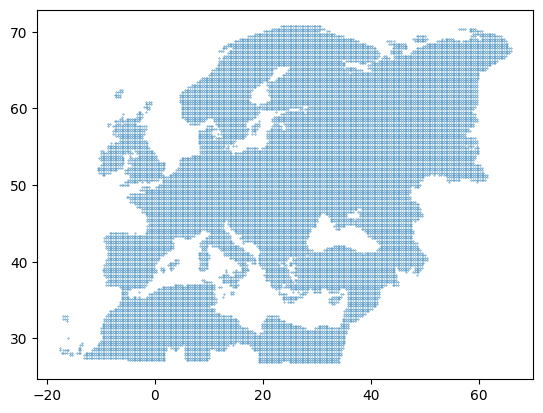

In [7]:
# kind of see a map of europe lol
plt.scatter(lon, lat, s=0.1)
plt.show()

So we map things by the X and Y: X = lon, Y = lat

In [9]:
# matrix lon, lat matrix of non masked values
jrc_XY = np.array([lon, lat]).T

We can map soilgrid with the api, or we can just use the soilgrids library

In [27]:
import requests

req = 'https://rest.isric.org/soilgrids/v2.0/properties/query?lon=5.041940&lat=46.659943&property=bdod&property=cec&property=cfvo&property=clay&property=nitrogen&property=ocd&property=ocs&property=phh2o&property=sand&property=silt&property=soc&property=wv0010&property=wv0033&property=wv1500&depth=0-5cm&depth=0-30cm&depth=5-15cm&depth=15-30cm&depth=30-60cm&depth=60-100cm&depth=100-200cm&value=Q0.5&value=Q0.05&value=Q0.95&value=mean&value=uncertainty'
small_req = 'https://rest.isric.org/soilgrids/v2.0/properties/query?lon=5.041940&lat=46.659943&property=nitrogen&depth=0-5cm&depth=0-30cm&depth=5-15cm&depth=15-30cm&depth=30-60cm&depth=60-100cm&depth=100-200cm&value=mean'
r = requests.get(small_req)

In [37]:
r.json()

{'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [5.04194, 46.659943]},
 'properties': {'layers': [{'name': 'nitrogen',
    'unit_measure': {'d_factor': 100,
     'mapped_units': 'cg/kg',
     'target_units': 'g/kg',
     'uncertainty_unit': ''},
    'depths': [{'range': {'top_depth': 0,
       'bottom_depth': 5,
       'unit_depth': 'cm'},
      'label': '0-5cm',
      'values': {'mean': 605}},
     {'range': {'top_depth': 5, 'bottom_depth': 15, 'unit_depth': 'cm'},
      'label': '5-15cm',
      'values': {'mean': 220}},
     {'range': {'top_depth': 15, 'bottom_depth': 30, 'unit_depth': 'cm'},
      'label': '15-30cm',
      'values': {'mean': 216}},
     {'range': {'top_depth': 30, 'bottom_depth': 60, 'unit_depth': 'cm'},
      'label': '30-60cm',
      'values': {'mean': 208}},
     {'range': {'top_depth': 60, 'bottom_depth': 100, 'unit_depth': 'cm'},
      'label': '60-100cm',
      'values': {'mean': 153}},
     {'range': {'top_depth': 100, 'bottom_depth': 200, '

Calculating the new longitudes going 25km east:

the km to change lon by 1 degree at lat x, km_1_degree = (pi/180) * (radius of earth) * cos(x in radians) <- km/degree
pi/180 converts the radians to degrees 

In [10]:
import math

r_earth = 6371
pi_180 = math.pi / 180

# test calculation with latitude
lat_rads = math.radians(46.659943)

denom = pi_180 * r_earth * math.cos(lat_rads)

def delta_lon(d_km, latitude):
    return d_km / (pi_180 * r_earth * math.cos(math.radians(latitude)))

In [ ]:
delta_lon(25, 46.659943)

0.32758496253600805

In [55]:
small_req_moved = f'https://rest.isric.org/soilgrids/v2.0/properties/query?lon={5.041940+0.0045}&lat=46.659943&property=nitrogen&depth=0-5cm&depth=0-30cm&depth=5-15cm&depth=15-30cm&depth=30-60cm&depth=60-100cm&depth=100-200cm&value=mean'

r2 = requests.get(small_req_moved)

In [56]:
r2.json()

{'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [5.0464400000000005, 46.659943]},
 'properties': {'layers': [{'name': 'nitrogen',
    'unit_measure': {'d_factor': 100,
     'mapped_units': 'cg/kg',
     'target_units': 'g/kg',
     'uncertainty_unit': ''},
    'depths': [{'range': {'top_depth': 0,
       'bottom_depth': 5,
       'unit_depth': 'cm'},
      'label': '0-5cm',
      'values': {'mean': 611}},
     {'range': {'top_depth': 5, 'bottom_depth': 15, 'unit_depth': 'cm'},
      'label': '5-15cm',
      'values': {'mean': 212}},
     {'range': {'top_depth': 15, 'bottom_depth': 30, 'unit_depth': 'cm'},
      'label': '15-30cm',
      'values': {'mean': 235}},
     {'range': {'top_depth': 30, 'bottom_depth': 60, 'unit_depth': 'cm'},
      'label': '30-60cm',
      'values': {'mean': 219}},
     {'range': {'top_depth': 60, 'bottom_depth': 100, 'unit_depth': 'cm'},
      'label': '60-100cm',
      'values': {'mean': 186}},
     {'range': {'top_depth': 100, 'bottom_dep

Now to calculate the latitude change!
This one is much more simple in comparison, it doesn't rely on the lon!

In [11]:
def delta_lat(d_km):
    return d_km / (pi_180 * r_earth)

So we can see that it changes when we move by 25 km east, so we need to do a 250km x 250km search and average the results,
assuming the point is in the middle we go west by 125 km and south by 125 km

In [12]:
from itertools import product

def calc_grid_pts(latitude, longitude):
    # the jrc  is 25km x 25km resolution
    # soilgrid is 250m x 250m resolution
    # == meaning 25/0.25 = 100 => 100 x 100 (or 10000 soil grid pts to average per jrc pt... YIKES)

    # calc corner coord of grid
    start_lat = latitude - delta_lat(12.5)
    end_lat = latitude + delta_lat(12.5)
    start_lon = longitude - delta_lon(12.5, start_lat)

    # calc all lon deltas, lon delta relies on lat values
    lat_delta = delta_lat(0.25) # 250m delta, will stay constant
    lats = np.array([(start_lat + (x * lat_delta)) for x in range(100)])

    # delta for going 250m, it depends on the lats
    lon_deltas = np.array([delta_lon(0.25, x) for x in lats])

    lons = np.empty((len(lats), len(lon_deltas)))
    for lon_delta, i in zip(lon_deltas, range(len(lons))):
        lons[i] = np.array([(start_lon + (x * lon_delta)) for x in range(100)])

    coords = np.empty(shape=(0, 2))
    for lat, lon in zip(lats, lons):
        coords = np.concatenate((coords, np.array(list(product([lat], lon)))))
    return coords

def bulk_calc_grid_pts(grid):
    coords = []
    for lat, lon in grid:
        coords.append(calc_grid_pts(lat, lon))
    return np.array(coords)

def get_request_property_vals(data):
    layers = []
    for layer in data['properties']['layers']:
        l_values = []
        for depth in layer['depths']:
            v = depth['values']['mean']
            if v:
                l_values.append(depth['values']['mean'])
            else:
                break
        if v:
            layers.append(np.array(l_values))
            
    return np.array(layers)

def avg_250_grid(coords, request):
    # (lat, lon) starting pos
    # request, w/o the lat & lon
    grid_vals = []
    for lat, lon in coords:
        r = requests.get(request+f'&lon={lon}&lat={lat}')
        data = r.json()
        print(data)
        grid_vals.append(get_request_property_vals(data))

    return np.array(grid_vals)

In [ ]:
import timeit

timeit.timeit(lambda: calc_grid_pts(46.659943, 5.04194), number=40320) # it do be takin a while, but! it precalcs everything so its not so bad?

99.24011109996354

In [13]:
full_coords = bulk_calc_grid_pts(jrc_XY)

In [ ]:
q = 'https://rest.isric.org/soilgrids/v2.0/properties/query?property=nitrogen&property=phh2o&depth=0-5cm&depth=0-30cm&depth=5-15cm&depth=15-30cm&depth=30-60cm&depth=60-100cm&depth=100-200cm&value=mean'
data = avg_250_grid(coords=full_coords[0], request=q)

variable_name: Soil pH in H2O
variable_units: pH*10
service_url: https://maps.isric.org/mapserv?map=/map/phh2o.map
service_id: phh2o
coverage_id: phh2o_0-5cm_mean
crs: urn:ogc:def:crs:EPSG::152160
bounding_box: (-1784000, 1356000, -1140000, 1863000)
grid_res: [250, 250]


/home/kwest/um/S1P/.venv/lib/python3.10/site-packages/xarray/plot/utils.py:260: RuntimeWarning: overflow encountered in scalar absolute
  vlim = max(abs(vmin - center), abs(vmax - center))


Text(0.5, 1.0, 'Mean pH between 0 and 5 cm soil depth in Senegal')

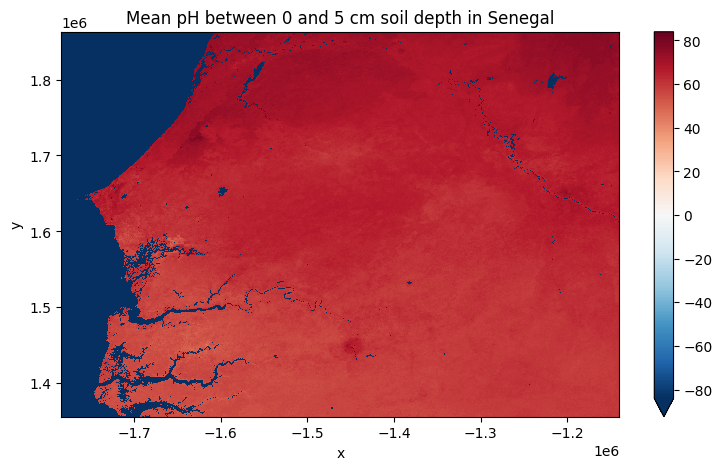

In [15]:
import matplotlib.pyplot as plt
from soilgrids import SoilGrids

# get data from SoilGrids
soil_grids = SoilGrids()
data = soil_grids.get_coverage_data(service_id='phh2o', coverage_id='phh2o_0-5cm_mean', 
                                       west=-1784000, south=1356000, east=-1140000, north=1863000,  
                                       crs='urn:ogc:def:crs:EPSG::152160',output='test.tif')

# show metadata
for key, value in soil_grids.metadata.items():
    print('{}: {}'.format(key,value))


# plot data
data.plot(figsize=(9,5))
plt.title('Mean pH between 0 and 5 cm soil depth in Senegal')

In [1]:
from soilgrids import SoilGrids

def get_soilgrid(coord, service_id, coverage_id,
                 crs='urn:ogc:def:crs:EPSG::4326',
                 output='test.tif',
                 resolution=(100, 100),
                 square_len=0.31
                 ):
    # assuming the coord is the center of the grid point, we need to calc the max and min values from the center
    # coord = (lon, lat)
    displace = square_len/2
    
    n, s = coord[1] + displace, coord[1] - displace #  latitude calcs
    e, w = coord[0] + displace, coord[0] - displace #  latitude calcs

    soil_grids = SoilGrids()
    data = soil_grids.get_coverage_data(service_id=service_id, coverage_id=coverage_id, 
                                        west=float(w), south=float(s), east=float(e), north=float(n),  
                                        crs=crs,output=output, 
                                        height=resolution[0], width=resolution[1]
                                        )
    
    return data.values

test = get_soilgrid((4.940522, 52.271991), service_id='phh2o', coverage_id='phh2o_0-5cm_mean')